## Dataset ##

In [1]:
class ClassDictionary():

    def __init__(self):
        fileClassi = open("classi.txt","r")
        i = 0
        self.classes = {}

        while True:
            riga  = fileClassi.readline()
            if riga == "":
                break
            self.classes[i] = riga.split('\n')[0]
            i +=1
            
    
        fileClassi.close()

    def get(self):
        return self.classes
    
    def IndexList(self):
        return list(self.classes.keys())
    
    def LabelList(self):
        return list(self.classes.values())

In [2]:
cDict = ClassDictionary()
classes = cDict.get()
indexlist = cDict.IndexList()

print(indexlist)
print(cDict.LabelList())
print(classes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['Sala 1', 'Sala 2', 'Sala 3', 'Sala 4', 'Sala 5', 'Sala 6', 'Sala 7', 'Sala 8', 'Sala 9', 'Sala 10', 'Sala 11 ', 'Sala 12', 'Sala 13', 'Cortile degli Stemmi', 'Sala Carrozze', 'Cortile Parisio', 'Biglietteria', 'Portico', 'Scala', 'Loggetta', 'BoxSala', 'Area Sosta']
{0: 'Sala 1', 1: 'Sala 2', 2: 'Sala 3', 3: 'Sala 4', 4: 'Sala 5', 5: 'Sala 6', 6: 'Sala 7', 7: 'Sala 8', 8: 'Sala 9', 9: 'Sala 10', 10: 'Sala 11 ', 11: 'Sala 12', 12: 'Sala 13', 13: 'Cortile degli Stemmi', 14: 'Sala Carrozze', 15: 'Cortile Parisio', 16: 'Biglietteria', 17: 'Portico', 18: 'Scala', 19: 'Loggetta', 20: 'BoxSala', 21: 'Area Sosta'}


In [3]:
import torch
from torch import Tensor
from torchvision import transforms
import numpy as np
import torch

In [4]:
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path

class ScenesDatabase(Dataset):
    def __init__(self,base_path,txt_list,transform = None, split = "first") :
        
        np.random.seed(5678) 
        torch.random.manual_seed(5678)

        self.base_path = base_path
        self.images = np.loadtxt(txt_list,dtype = str , delimiter= ' ')
        np.random.shuffle(self.images)
        
        split_idx = len(self.images) // 2
        if split ==  "first":
            self.images = self.images[:split_idx]
        elif split == "second":
            self.images = self.images[split_idx:]
        self.transform = transform
        
    def __getitem__(self, index):
        f,c = self.images[index]
        res = f.split('/')

        if res[7] == "":
           f = res[6] + '/' + res[7] + res[8] 
        else:
           f = res[6] + '/' + res[7]
           if res[7].split('.')[1] != "jpg":
            f = f + "jpg"

       #print(self.base_path,f)
  
        im = Image.open(path.join(self.base_path,f))

        if self.transform is not None: 
           im = self.transform(im)

        label = int(c)

        return {'image' : im, 'label':label}
    
    def getLabel(self,index):
        return int(self.images[index][1])

    def __len__(self):
        return int(len(self.images))
       
    



In [5]:
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt')
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt')
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',split = "second") 

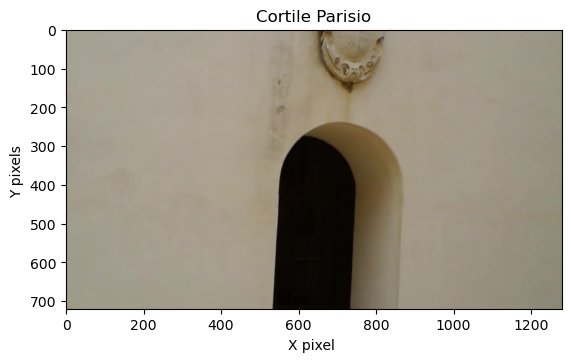

width:  1280  height:  720


In [6]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

sample = train[1]

#print(sample["label"])
 
plt.title(classes[sample["label"]])
plt.xlabel("X pixel ")
plt.ylabel("Y pixels ")

img = sample["image"]
 
#image = mpimg.imread(sample["image"])
plt.imshow(img)
plt.show()
print("width: ",img.width," height: ",img.height)

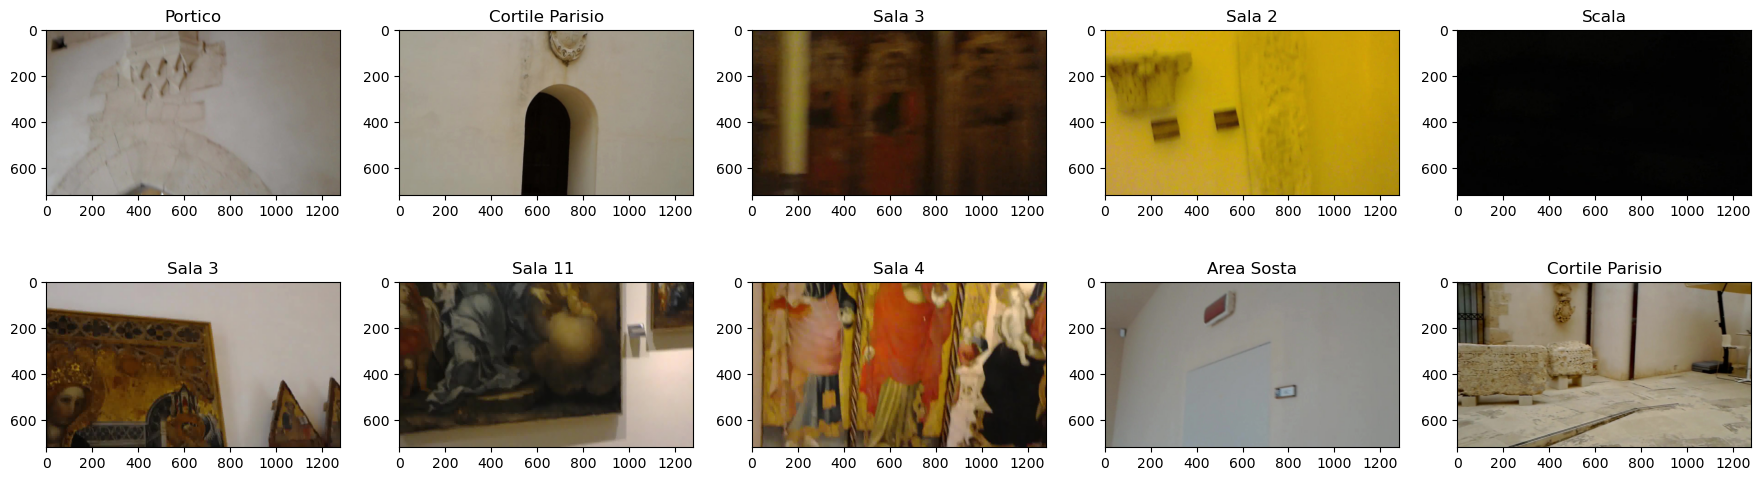

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(22,6)) 

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

49127
[1324, 2755, 2901, 4087, 4053, 946, 3697, 2451, 3614, 2053, 2591, 865, 1042, 2020, 1133, 3628, 1459, 2049, 2308, 1478, 1652, 1252]


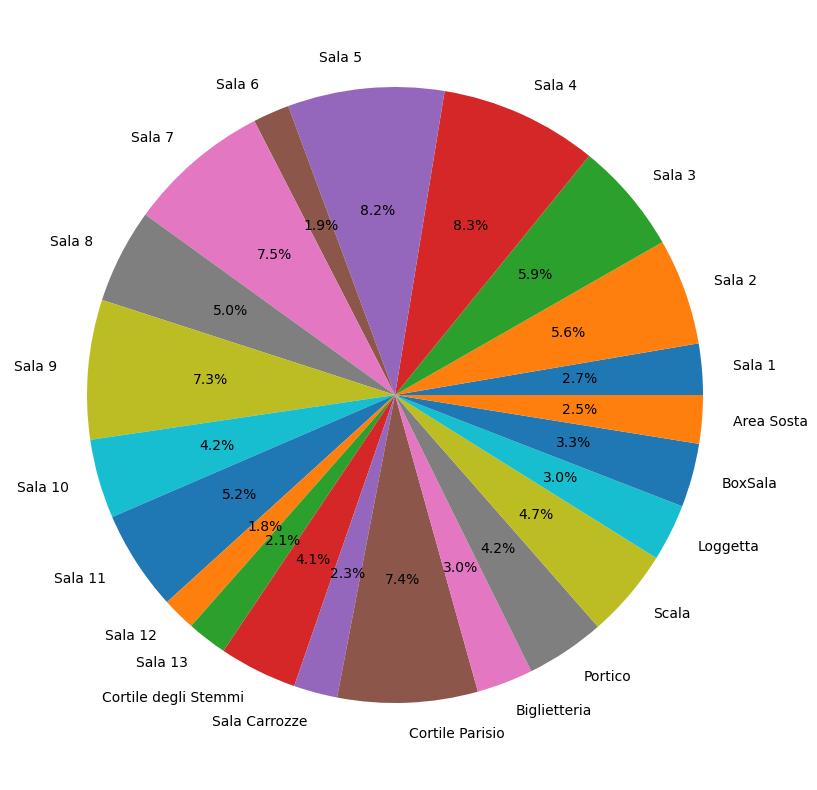

In [8]:
#info training set

indexlist = cDict.IndexList()

print(len(train))

for i in range(len(train)):
    indexlist[train.getLabel(i)] += 1


print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show() 

21055
[561, 1174, 1271, 1697, 1757, 407, 1594, 1040, 1561, 876, 1129, 378, 447, 905, 483, 1560, 637, 869, 1018, 649, 739, 534]


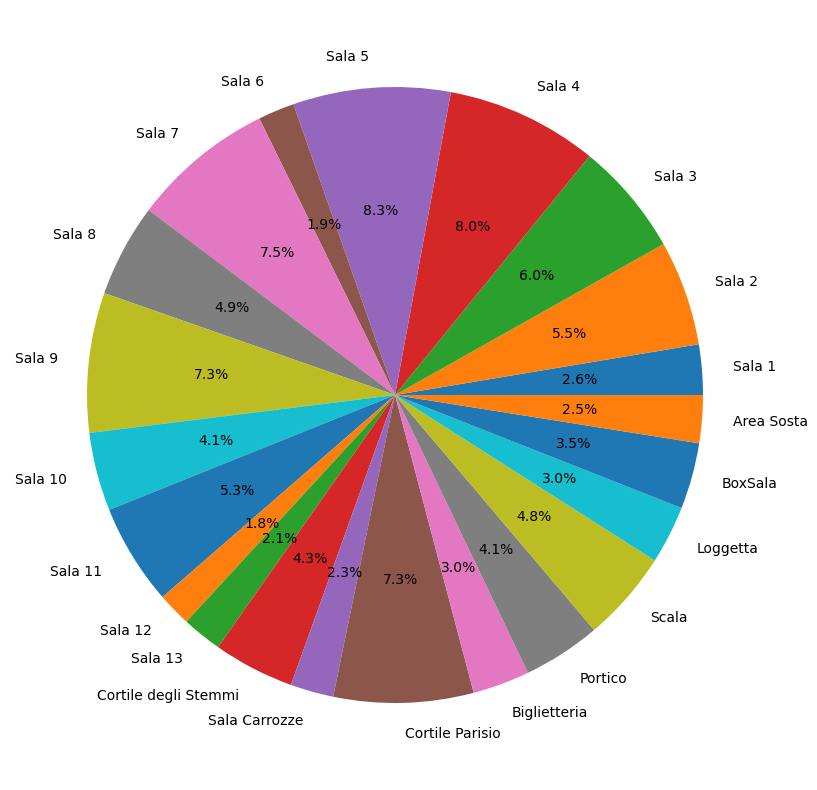

In [9]:
#info test set

indexlist = cDict.IndexList()

print(len(test))

for i in range(len(test)):
    indexlist[test.getLabel(i)] += 1

print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show() 

21054
[555, 1218, 1219, 1758, 1714, 392, 1602, 1047, 1606, 891, 1094, 383, 489, 877, 523, 1582, 625, 875, 937, 639, 700, 559]


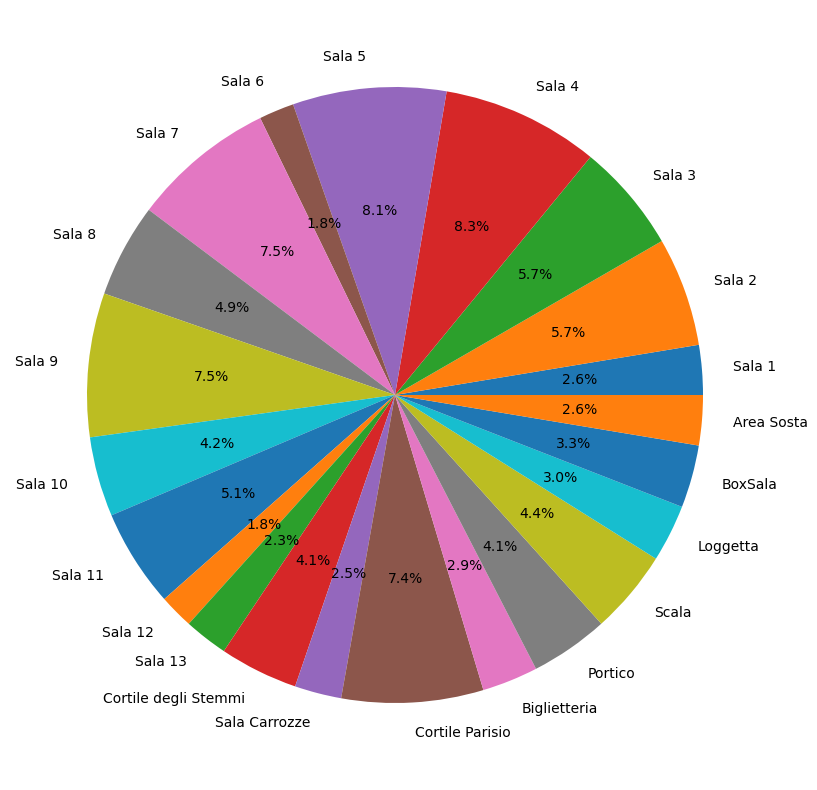

In [10]:
#info validation set

indexlist = cDict.IndexList()

print(len(validation))

for i in range(len(validation)):
    indexlist[validation.getLabel(i)] += 1

print(indexlist)
plt.figure(figsize=(10,10))
plt.pie(indexlist, labels= cDict.LabelList() , autopct='%1.1f%%' )
#plt.legend(title = "Classi")
plt.show()

In [11]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
valisation_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img,title):
    # Convert from tensor image
    img = img.numpy().transpose((1, 2, 0))
    img = s * img + m  # Using the provided normalization values to unnormalize
    img = np.clip(img, 0, 1)
    
    plt.title(title)
    plt.imshow(img)

def showimage_from_loader(loader,classes):
    dataiter = iter(loader)
    batch = next(dataiter)
    images = batch['image']
    labels = batch['label']

    fig = plt.figure(figsize=(20, 10))

    for idx in range(40):
        ax = fig.add_subplot(5, 8, idx+1, xticks=[], yticks=[])
        imshow(images[idx],classes[labels[idx].item()])
        

    plt.show()

## Fine-tuning ##

### Resnet-18 ###

In [13]:
import torchvision.models as models

model = models.resnet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
#rendiamo le immagini compatibili con il nuovo modello 

transform = transforms.Compose([transforms.Resize([256]), transforms.CenterCrop([224])])
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform) 

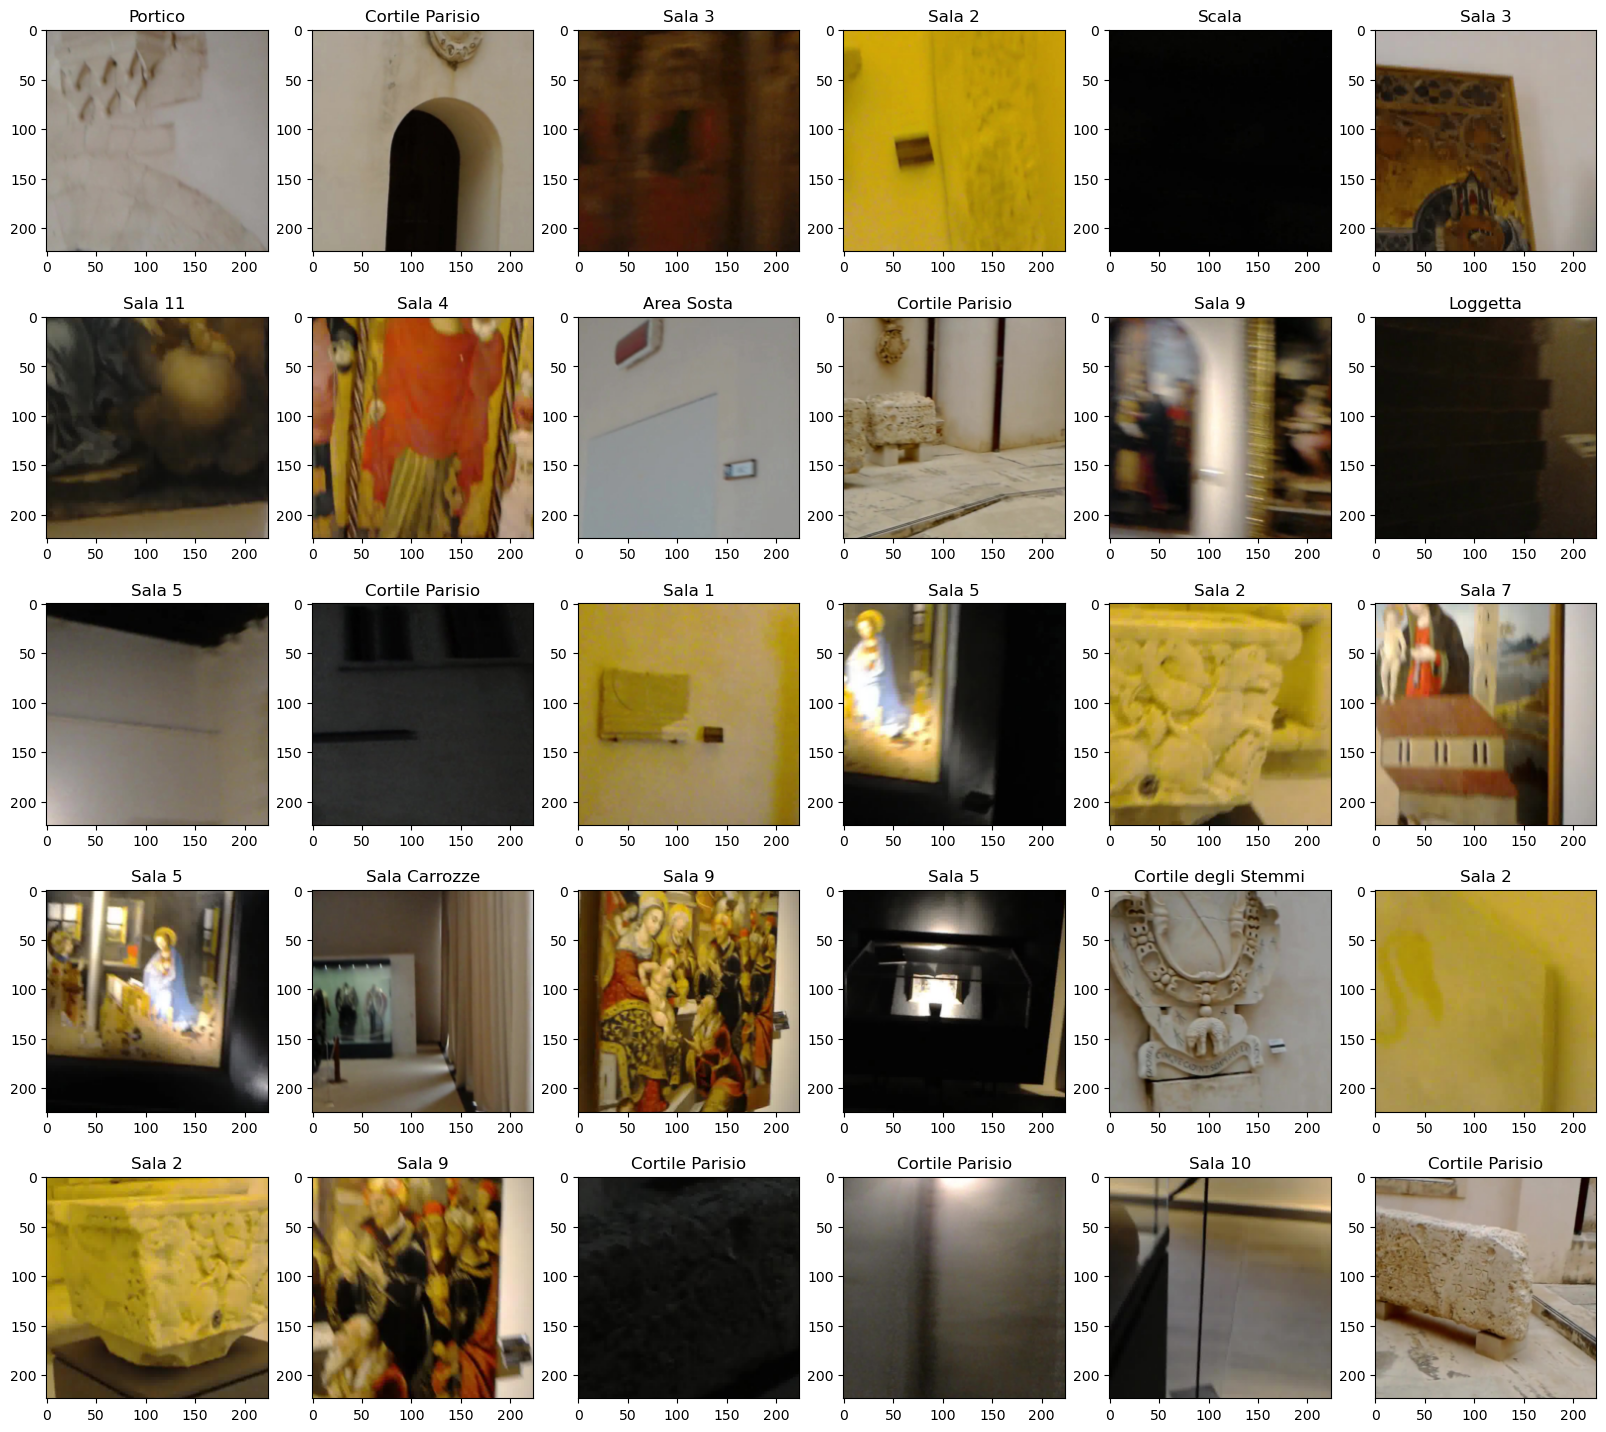

In [15]:
plt.figure(figsize=(20,18)) 

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title(classes[train.getLabel(i)]) 
    plt.imshow(train[i]["image"])

plt.show()

In [16]:
from torch import nn
import torchvision.models as models
from torchvision.models.resnet import ResNet18_Weights

class BellomoClassifier(nn.Module):

    def __init__(self):
        super(BellomoClassifier, self).__init__()

        #self.resnet = models.resnet18(pretrained = True)
        self.resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        self.features = nn.Sequential(*list(list(self.resnet.children())[:-1])) #rimozione ultimo livello
        self.flatten = nn.Flatten()
        
        # Classificatore
        self.fc = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256,22)
        )


    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata 
        x = self.features(x)
        x = self.flatten(x)
        #x = self.fc(x.view(x.shape[0],-1))
        x = self.fc(x) 
        return x

### Prima prova ###

Adattiamo le immaggini ai modello resnet

In [15]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [16]:
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',transform=transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',transform=transform) 

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
validation_loader = DataLoader(validation, batch_size=100, num_workers=0 , drop_last= True)

In [17]:
for batch in train_loader: 
    break

print(batch["image"].shape)
print(batch["label"].shape)

torch.Size([100, 3, 224, 224])
torch.Size([100])


In [19]:
net = BellomoClassifier()
#total_params = sum(p.numel() for p in net.parameters())
num_parameters =0
num_parameters += sum(p.numel() for p in net.features.parameters())
num_parameters += sum(p.numel() for p in net.fc.parameters())
print("#parametri modello:",num_parameters)

#parametri modello: 11313494


In [20]:
class AverageValueMeter(): 
    
    def __init__(self): 
        self.reset()

    def reset(self): 
        self.sum = 0 
        self.num = 0

    def add(self, value, num): 
        self.sum += value*num 
        self.num += num

    def value(self): 
        try:
            return self.sum/self.num 
        except:
            return None

In [21]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum) 
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x,y = batch
                    x= batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

no augmentation - no regolarizzazione - lr 0.01

In [120]:
net = BellomoClassifier() 
net = train_classifier(net, train_loader, validation_loader,'weight/BellomoClassifier',logdir='logs/BellomoClassifier/NoAugmentation', epochs=15)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [23]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier",15)))
net = train_classifier(net, train_loader, validation_loader,'weight/BellomoClassifier',logdir='logs/BellomoClassifier/NoAugmentation', start_epochs=15 , epochs= 30)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


## Data augmentation ##

In [17]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

train_transform = transforms.Compose([
    transforms.Resize(300,), #Video Acquisition: 1280x720 at 29.97 fps
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m, s)
])
test_transform = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

In [18]:
validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform) 
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',train_transform) 

train_loader = DataLoader(train, batch_size=100, num_workers=0 , drop_last= True) 
validation_loader = DataLoader(validation, batch_size=100, num_workers=0 , drop_last= True)

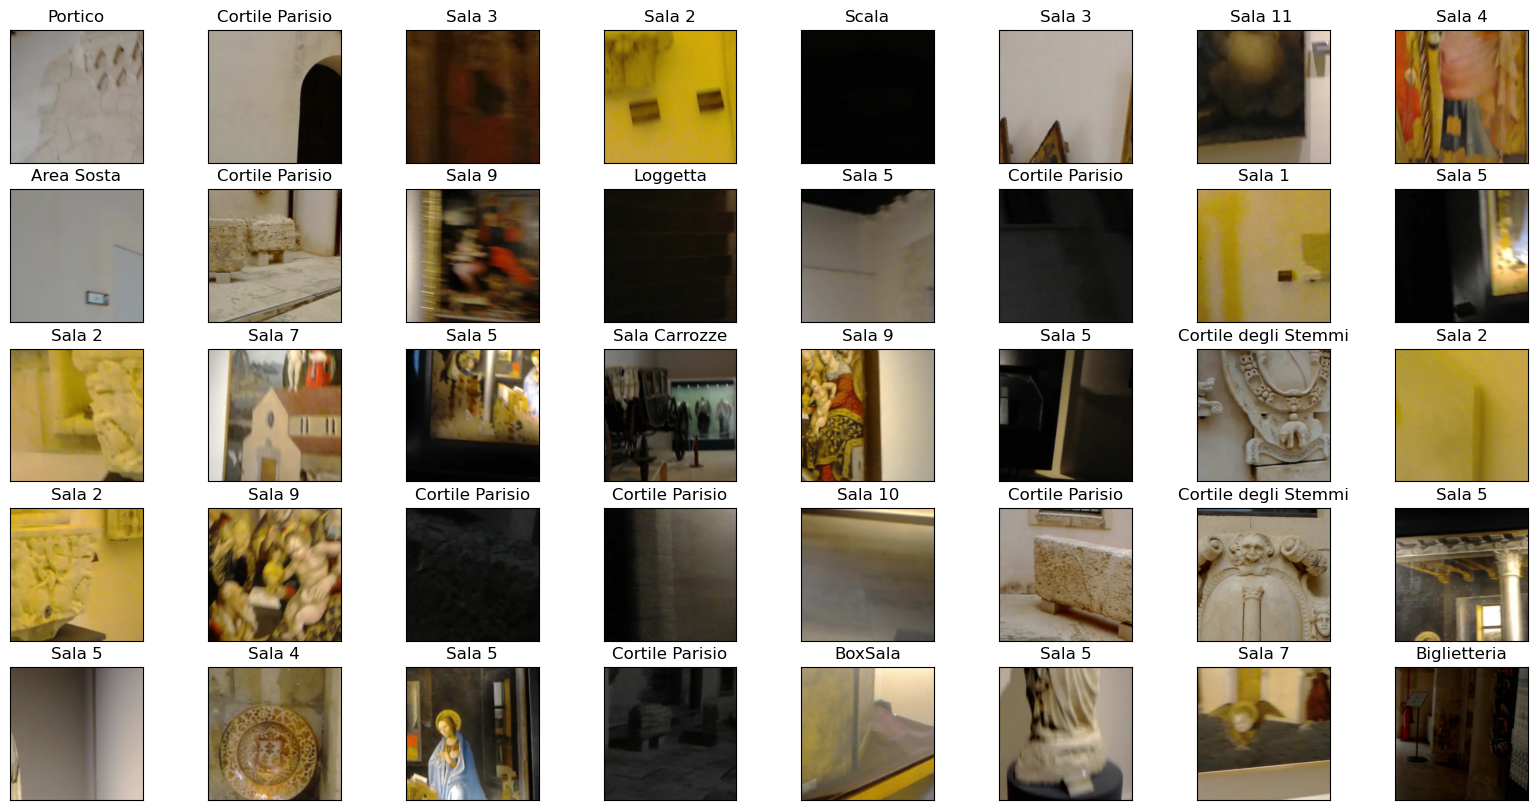

In [19]:
showimage_from_loader(train_loader,classes=ClassDictionary().get())

## Regolarizzazione (Tenere sotto controllo overfitting con la regolarizzazione) ##

In [20]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter 
from sklearn.metrics import accuracy_score
from os.path import join

class AverageValueMeter(): 
    
    def __init__(self): 
        self.reset()

    def reset(self): 
        self.sum = 0 
        self.num = 0

    def add(self, value, num): 
        self.sum += value*num 
        self.num += num

    def value(self): 
        try:
            return self.sum/self.num 
        except:
            return None


def train_classifier_r(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs/BellomoClassifier/', start_epochs = 0, weight_decay = 1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr, momentum=momentum , weight_decay = weight_decay) #aggiungo regolarizazione
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()

    writer = SummaryWriter(join(logdir,'%d-%s'%(epochs,"epoche")))
   
    device = "cuda" if torch.cuda.is_available() else "cpu" 

    model.to(device)
    print("device:",device)
    #definiamo un dizionario contenente i loader di training e test 
    loader = {
        'train' : train_loader,
        'test' : test_loader 
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        
        if e < start_epochs:
            continue
        
        print("start new epochs %d"%(e+1))

        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for batch in (loader[mode]):
                    #print("batch")
                    x=batch["image"].to(device) 
                    #y=torch.tensor(batch["label"]).to(device)
                    y = batch["label"].clone().detach().to(device)
                    output = model(x)
              
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                if mode=='train': 
                    l.backward()
                    optimizer.step() 
                    optimizer.zero_grad()

                acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1]) 
                loss_meter.add(l.item(),n)
                acc_meter.add(acc,n)
 
                if mode=='train':
                    writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step) 
                    writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
        
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step) 
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
        
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1)) 
    return model

## Seconda prova ##

In [23]:
net = BellomoClassifier() 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a', epochs=15 , logdir= "logs/BellomoClassifier-r/A-r(1e-3)-lr(0.01)", weight_decay= 1e-3)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [20]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a",15)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a', start_epochs=15, epochs=30 , logdir= "logs/BellomoClassifier-r/A-r(1e-3)-lr(0.01)", weight_decay= 1e-3)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


## Terza prova ##

Aumento fattore di regolarizzazione


In [21]:
net = BellomoClassifier() 
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', epochs=15 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


In [21]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",15)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=15, epochs=30 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 16
start new epochs 17
start new epochs 18
start new epochs 19
start new epochs 20
start new epochs 21
start new epochs 22
start new epochs 23
start new epochs 24
start new epochs 25
start new epochs 26
start new epochs 27
start new epochs 28
start new epochs 29
start new epochs 30


In [25]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",30)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=30, epochs=40 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

device: cuda
start new epochs 31
start new epochs 32
start new epochs 33
start new epochs 34
start new epochs 35
start new epochs 36
start new epochs 37
start new epochs 38
start new epochs 39
start new epochs 40


In [ ]:
net = BellomoClassifier() 
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r-a-2",40)))
net = train_classifier_r(net, train_loader, validation_loader,'weight/BellomoClassifier-r-a-2', start_epochs=40, epochs=50 , logdir= "logs/BellomoClassifier-r/A-r(1e-2)-lr(0.01)", weight_decay= 1e-2)

### Altri metodi per la valutazione ###

In [45]:
from sklearn.metrics import f1_score

def f1_score_train_test(test_loader,train_loader,model):

    resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
    resnet_finetuned_predictions_train, labels_train = test_classifier(net,train_loader)
    
    scores_training = f1_score(labels_train,resnet_finetuned_predictions_train, average=None)
    scores_testing = f1_score(labels_test,resnet_finetuned_predictions_test, average=None)

    print("F1 score in traning",scores_training)
    print("F1 score in test",scores_testing)

    print("F1 score mean in traning",scores_training.mean())
    print("F1 score mean in test",scores_testing.mean())




Disattivo dropOut

In [46]:
net = BellomoClassifier().eval()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(5e-2)",15)))
    
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

f1_score_train_test(test_loader=test_loader,train_loader=train_loader,model=net)



F1 score in traning [0.3810089  0.75707121 0.3003029  0.2425876  0.4993587  0.
 0.31282682 0.34501012 0.37676207 0.38288557 0.3506447  0.03282051
 0.19001218 0.32912696 0.35281267 0.42505995 0.30689142 0.13880368
 0.49250535 0.21463952 0.32626263 0.        ]
F1 score in test [0.38731909 0.76720075 0.29725686 0.26861581 0.51535581 0.
 0.32210004 0.35714286 0.41785124 0.39128419 0.36832896 0.04494382
 0.22447102 0.31872038 0.4403444  0.40647606 0.31928783 0.13027523
 0.51254753 0.20784821 0.37375513 0.        ]
F1 score mean in traning 0.3071542489128943
F1 score mean in test 0.32141478214443037


In [ ]:
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=100, num_workers=0 , drop_last= True)

net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(5e-3)",30)))

resnet_finetuned_predictions_test, labels_test = test_classifier(net,test_loader)
print ("Accuracy di resnet su Bellomo dataset (test set): %0.2f%%" % (accuracy_score(labels_test, resnet_finetuned_predictions_test)*100,))

 ### Bilanciamento distribuzione classi ###

In [74]:
from torch.utils.data import WeightedRandomSampler

def get_class_weights(indexlist):
    total_samples = sum(indexlist.values())
    num_classes = len(indexlist)
    class_weights = {k: total_samples / (num_classes * v) for k, v in indexlist.items()}
    return class_weights

In [67]:
m = [0.485, 0.456, 0.408]
s = [0.229, 0.224, 0.225] 

train_transform = transforms.Compose([
    transforms.Resize(256,), #Video Acquisition: 1280x720 at 29.97 fps
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m, s)
])
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

validation = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform) 
validation_loader = DataLoader(validation, batch_size=100, num_workers=0 , drop_last= True)

In [75]:
train = ScenesDatabase('Bellomo/Training/','Bellomo/Training/training.txt',train_transform) 

indexlist = {i: 0 for i in range(1,23)}

print(indexlist)

print(len(train))

for i in range(len(train)):
    indexlist[train.getLabel(i)] += 1

print(indexlist)

class_weights = get_class_weights(indexlist)

# pesi per ogni campione nel dataset 
sample_weights = [class_weights[train.getLabel(idx)] for idx in range(len(train))]

sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train), replacement=True)

train_loader = DataLoader(train, batch_size=100, sampler=sampler)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0}
49127
{0: 1324, 1: 2754, 2: 2899, 3: 4084, 4: 4049, 5: 941, 6: 3691, 7: 2444, 8: 3606, 9: 2044, 10: 2581, 11: 854, 12: 1030, 13: 2007, 14: 1119, 15: 3613, 16: 1443, 17: 2032, 18: 2290, 19: 1459, 20: 1632, 21: 1231}


In [ ]:
def imshow(img,title):
    # Convert from tensor image
    img = img.numpy().transpose((1, 2, 0))
    img = s * img + m  # Using the provided normalization values to unnormalize
    img = np.clip(img, 0, 1)
    
    plt.title(title)
    plt.imshow(img)

In [ ]:
showimage_from_loader(train_loader,classes= classes)

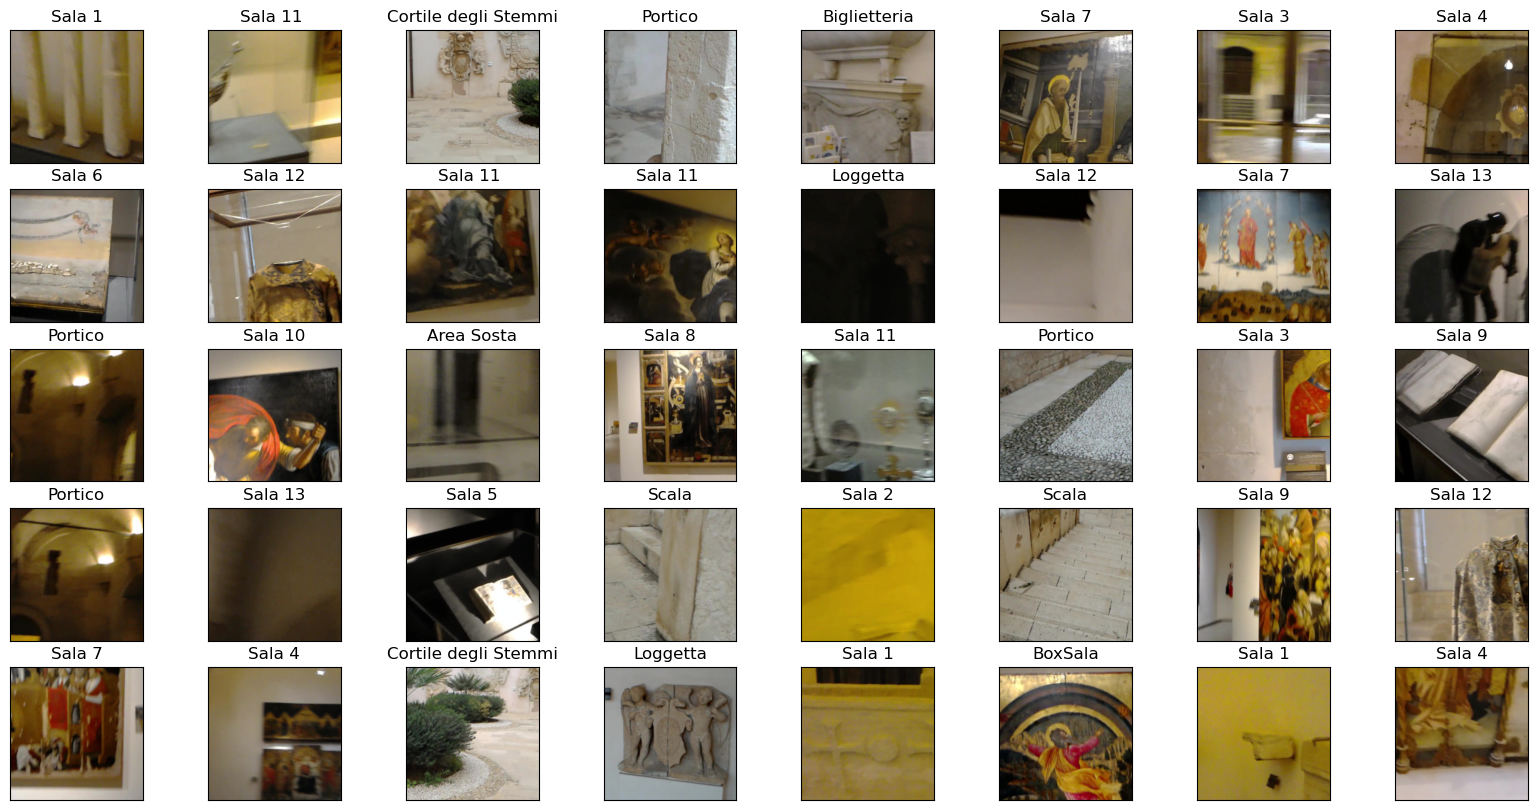

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

dataiter = iter(train_loader)
batch = next(dataiter)
images = batch['image']
labels = batch['label']

fig = plt.figure(figsize=(20, 10))

for idx in range(40):
    ax = fig.add_subplot(5, 8, idx+1, xticks=[], yticks=[])
    imshow(images[idx],classes[labels[idx].item()])
    

plt.show()


In [78]:
import matplotlib.pyplot as plt

def plot_class_distribution(loader, class_names):
    # Inizializza un contatore per tutte le classi
    class_counts = [0] * len(class_names)

    # Itera attraverso il loader e conta le occorrenze di ciascuna classe
    for batch in loader:
        labels = batch['label']
        for label in labels:
            print("-")
            class_counts[label] += 1

    # Visualizza il grafico a torta
    plt.figure(figsize=(10, 10))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
    plt.show()

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


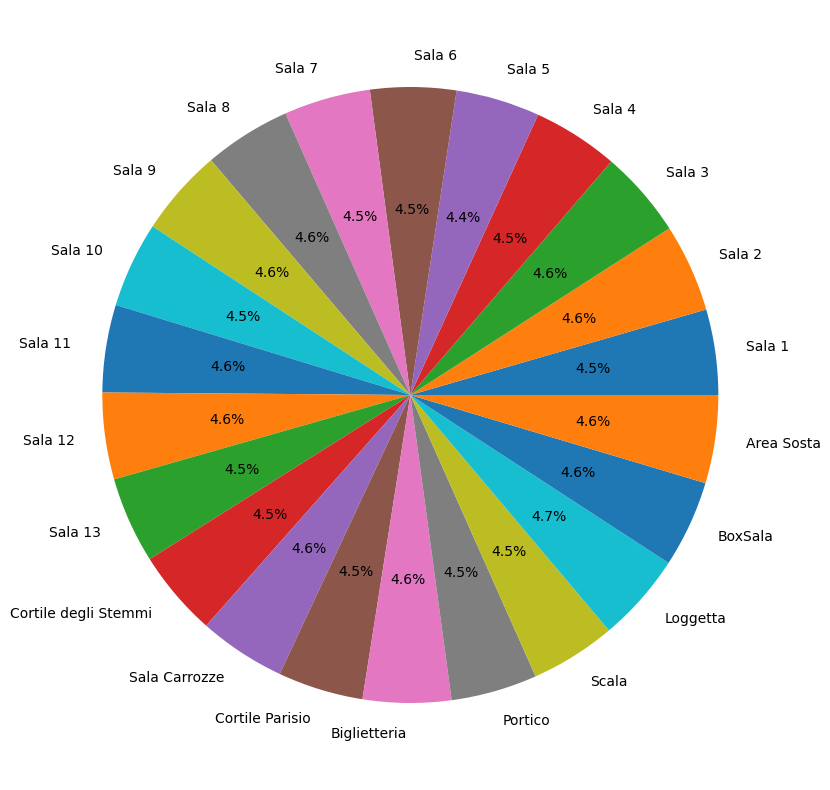

In [79]:
plot_class_distribution(train_loader, cDict.LabelList())

training bilanciato

In [80]:
net = BellomoClassifier()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(5e-2)",15)))
net = train_classifier_r(net, train_loader, validation_loader ,'weight/BellomoClassifier-b(5e-3)', epochs=15 , logdir= "logs/BellomoClassifier-b(5e-3)/" , lr= 0.01 ,weight_decay=  5e-3)

device: cuda
start new epochs 1
start new epochs 2
start new epochs 3
start new epochs 4
start new epochs 5
start new epochs 6
start new epochs 7
start new epochs 8
start new epochs 9
start new epochs 10
start new epochs 11
start new epochs 12
start new epochs 13
start new epochs 14
start new epochs 15


riduzione fattore di regolazione

In [ ]:
net = BellomoClassifier()
net.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-b(5e-2)",15)))
net = train_classifier_r(net, train_loader, validation_loader ,'weight/BellomoClassifier-b(5e-3)', epochs=10 , logdir= "logs/BellomoClassifier-b(5e-3)/" , lr= 0.01 ,weight_decay=  5e-3)

Provare con google net

## Demo ##

In [73]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(m,s)
])

sostituire con caricamento immagine da disco e rimuovere random flip nel test

In [74]:
test = ScenesDatabase('Bellomo/Training/','Bellomo/Training/validation.txt',test_transform, split="second")
test_loader = DataLoader(test, batch_size=1, num_workers=0 , drop_last= True) 

In [90]:
def Demo(loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = BellomoClassifier()
    model.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(5e-2)",15)))

    model.to(device)
    classes = cDict.get()
    
    for batch in loader:

        images = batch['image']
        labels = batch['label']

        x = batch["image"].to(device)
        y = batch["label"].to(device)

        output = model(x)

        print(output)
        
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()

        imshow(images[0], classes[ labels[0].item() ])

    #return classes[preds[0]] ,classes[labs[0]]

In [76]:
def test_classifier(loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = BellomoClassifier()
    model.load_state_dict(torch.load('%s-%d.pth'%("weight/BellomoClassifier-r(5e-2)",15)))

    model.to(device)
    predictions, labels = [], []
    for batch in loader:
        x = batch["image"].to(device)
        y = batch["label"].to(device)
        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
        predictions.extend(list(preds))
        labels.extend(list(labs))
    return np.array(predictions), np.array(labels)

In [ ]:
Demo(test_loader)

aggiungere trasformazione immagine dentro la funzione Demo